# Regularization

## Import Libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

## Dataset

In [ ]:
np.random.seed(42)

X_train = np.sort(np.random.uniform(-3, 3, 20))
y_train = np.sin(X_train) + np.random.normal(0, 0.3, 20)

X_test = np.linspace(-3, 3, 100)
y_test = np.sin(X_test) + np.random.normal(0, 0.1, 100)

X_train = X_train.reshape(-1, 1)
X_test_reshaped = X_test.reshape(-1, 1)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Training samples: 20
Test samples: 100


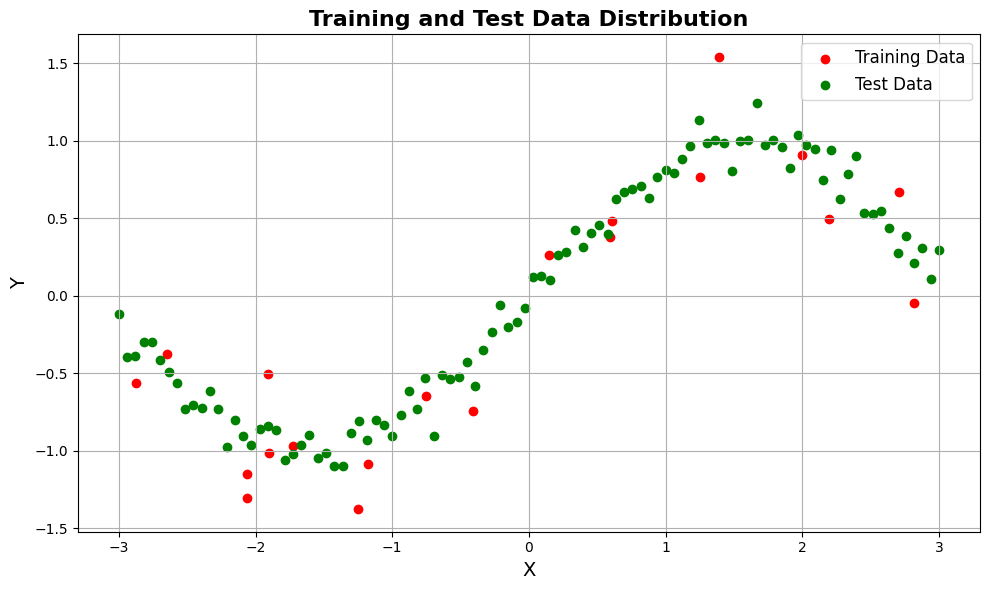

Training points: 20 (red dots)
Test points: 100 (green dots)


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Training and Test Data Distribution', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Training points: {len(X_train)} (red dots)")
print(f"Test points: {len(X_test)} (green dots)")

## Overfitting Model - Linear Regression

Overfitting Model (Degree 15, Linear Regression):
Training MSE: 0.0082
Test MSE: 29.0628
Huge gap indicates overfitting!


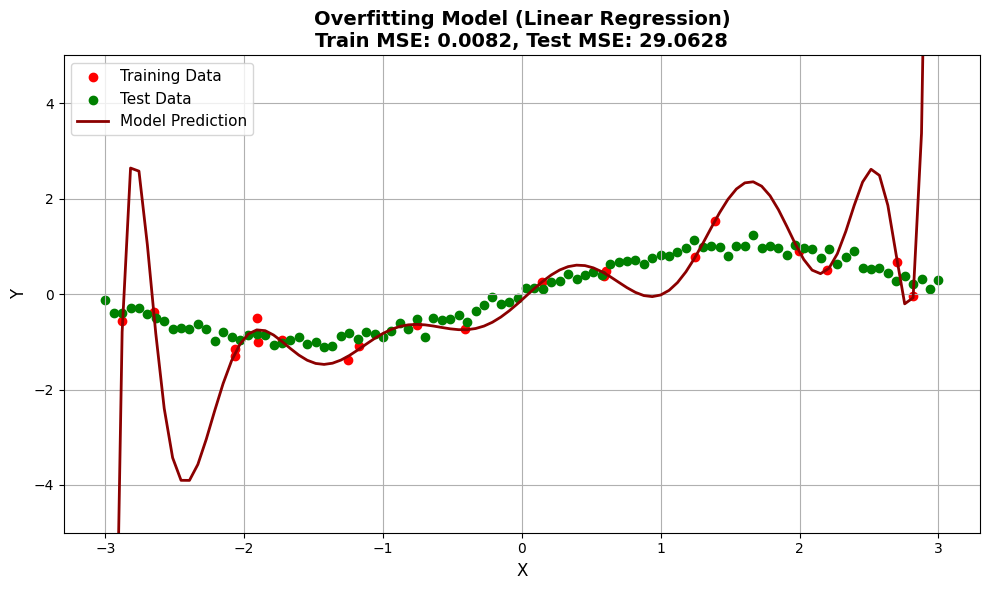

In [ ]:
degree = 15
overfitting_model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])

overfitting_model.fit(X_train, y_train)

y_train_pred_overfit = overfitting_model.predict(X_train)
y_test_pred_overfit = overfitting_model.predict(X_test_reshaped)

train_mse_overfit = mean_squared_error(y_train, y_train_pred_overfit)
test_mse_overfit = mean_squared_error(y_test, y_test_pred_overfit)

print(f"Overfitting Model (Degree {degree}, Linear Regression):")
print(f"Training MSE: {train_mse_overfit:.4f}")
print(f"Test MSE: {test_mse_overfit:.4f}")
print(f"Huge gap indicates overfitting!")

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_test_pred_overfit, color='darkred', linewidth=2, label='Model Prediction')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title(f'Overfitting Model (Linear Regression)\nTrain MSE: {train_mse_overfit:.4f}, Test MSE: {test_mse_overfit:.4f}', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

## Regularized Model - Ridge Regression

Regularized Model (Degree 15, Ridge Regression:
Training MSE: 0.0325
Test MSE: 15.5091


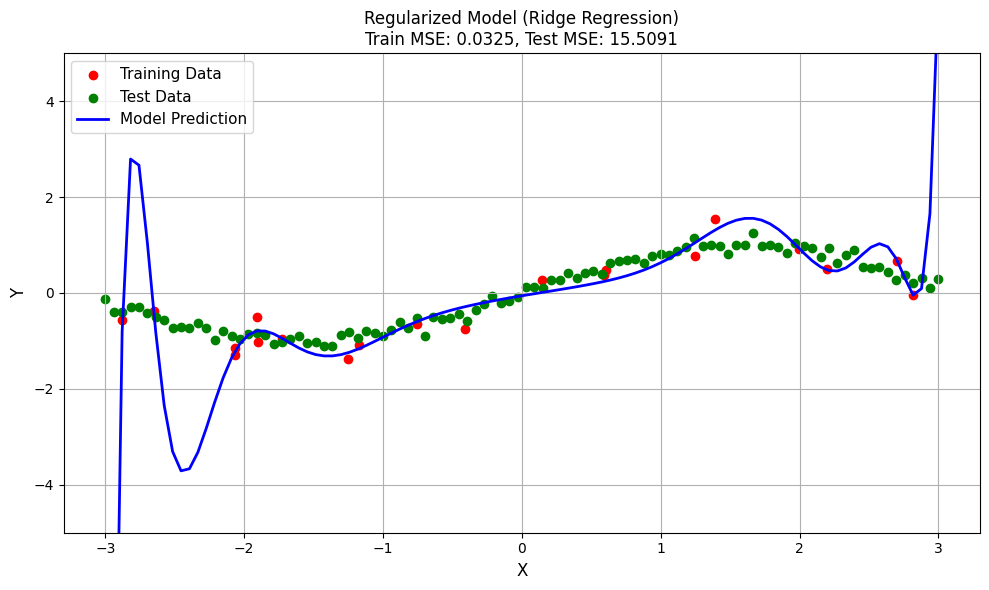

In [ ]:
regularized_model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('ridge', Ridge(alpha=1.0))
])

regularized_model.fit(X_train, y_train)

y_train_pred_reg = regularized_model.predict(X_train)
y_test_pred_reg = regularized_model.predict(X_test_reshaped)

train_mse_reg = mean_squared_error(y_train, y_train_pred_reg)
test_mse_reg = mean_squared_error(y_test, y_test_pred_reg)

print(f"Regularized Model (Degree {degree}, Ridge Regression:")
print(f"Training MSE: {train_mse_reg:.4f}")
print(f"Test MSE: {test_mse_reg:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_test_pred_reg, color='blue', linewidth=2, label='Model Prediction')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title(f'Regularized Model (Ridge Regression)\nTrain MSE: {train_mse_reg:.4f}, Test MSE: {test_mse_reg:.4f}')
plt.legend(fontsize=11)
plt.grid(True)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

## Model Comparison

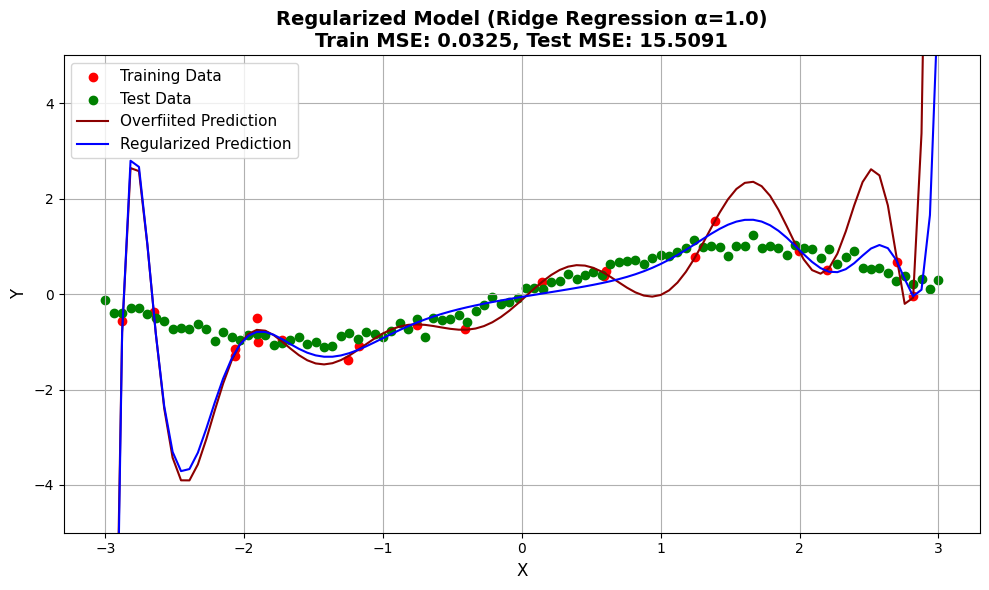

Left Plot (Linear Regression): Model fits training data perfectly
but has wild oscillations and poor generalization.

Right Plot (Ridge Regression): Regularization creates smoother
predictions and better generalization to test data.


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_test_pred_overfit, color='darkred', label='Overfiited Prediction')
plt.plot(X_test, y_test_pred_reg, color='blue', label='Regularized Prediction')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title(f'Regularized Model (Ridge Regression α=1.0)\nTrain MSE: {train_mse_reg:.4f}, Test MSE: {test_mse_reg:.4f}', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

print("Left Plot (Linear Regression): Model fits training data perfectly")
print("but has wild oscillations and poor generalization.")
print("\nRight Plot (Ridge Regression): Regularization creates smoother")
print("predictions and better generalization to test data.")